### League of Legends: Exploratory Analysis

Standard Methodology:

1. **Exploratory plots to get a sense of data (e.g. relationships, distribution etc.)**
2. Perform transformations (standardization, log-transform, PCA etc.)
3. Experiment with algorithms that make sense, feature selection and compare cross-validated performance.Algos to thinks about: Tree-Based, Basis Expansion, Logistic Regression, Discriminant  Analysis, Boosting, Neural Nets...

4. Run on test set

In [33]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [4]:
def read_pickle(path):
    
    input_file = open(path,'rb')
    variable = pickle.load(input_file)
    input_file.close()
    return(variable)

In [42]:
x_train = '../data/x_train.pickle'
x_test = '../data/x_test.pickle'
y_train = '../data/y_train.pickle'
y_test = '../data/y_test.pickle'

x_train = read_pickle(x_train) 
x_test = read_pickle(x_test) 
y_train = read_pickle(y_train) 
y_test = read_pickle(y_test) 

In [43]:
#Our features have a pretty wide range. Lets start by standardizing
x = x_train.set_index('gameid').values #returns a numpy array
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
x_train = pd.DataFrame(x_scaled, columns = x_train.set_index('gameid').columns)

### 1. Basic Exploratory Analysis

1. Distributions of features
2. Boxplots
3. Feature vs Feature plots

In [47]:
feature_columns = x_train.columns
feature_columns

Index(['delta_assists', 'delta_damagetochampions', 'delta_deaths',
       'delta_kills', 'delta_monsterkills', 'delta_total_cs',
       'delta_totalgold', 'delta_wardskilled', 'delta_wardsplaced',
       'delta_armor', 'delta_armorperlevel', 'delta_attackdamage',
       'delta_attackdamageperlevel', 'delta_attackrange', 'delta_attackspeed',
       'delta_attackspeedperlevel', 'delta_crit', 'delta_critperlevel',
       'delta_gap_closer_value', 'delta_hard_cc_value', 'delta_hp',
       'delta_hpperlevel', 'delta_hpregen', 'delta_hpregenperlevel',
       'delta_movespeed', 'delta_mp', 'delta_mpperlevel', 'delta_mpregen',
       'delta_mpregenperlevel', 'delta_protection_value',
       'delta_soft_cc_value', 'delta_spellblock', 'delta_spellblockperlevel',
       'delta_spells_average_range_value', 'delta_Assassin', 'delta_Fighter',
       'delta_Mage', 'delta_Marksman', 'delta_Support', 'delta_Tank',
       'gamelength'],
      dtype='object')

In [79]:
len(feature_columns)

41

In [59]:
type(x_train)

pandas.core.frame.DataFrame

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


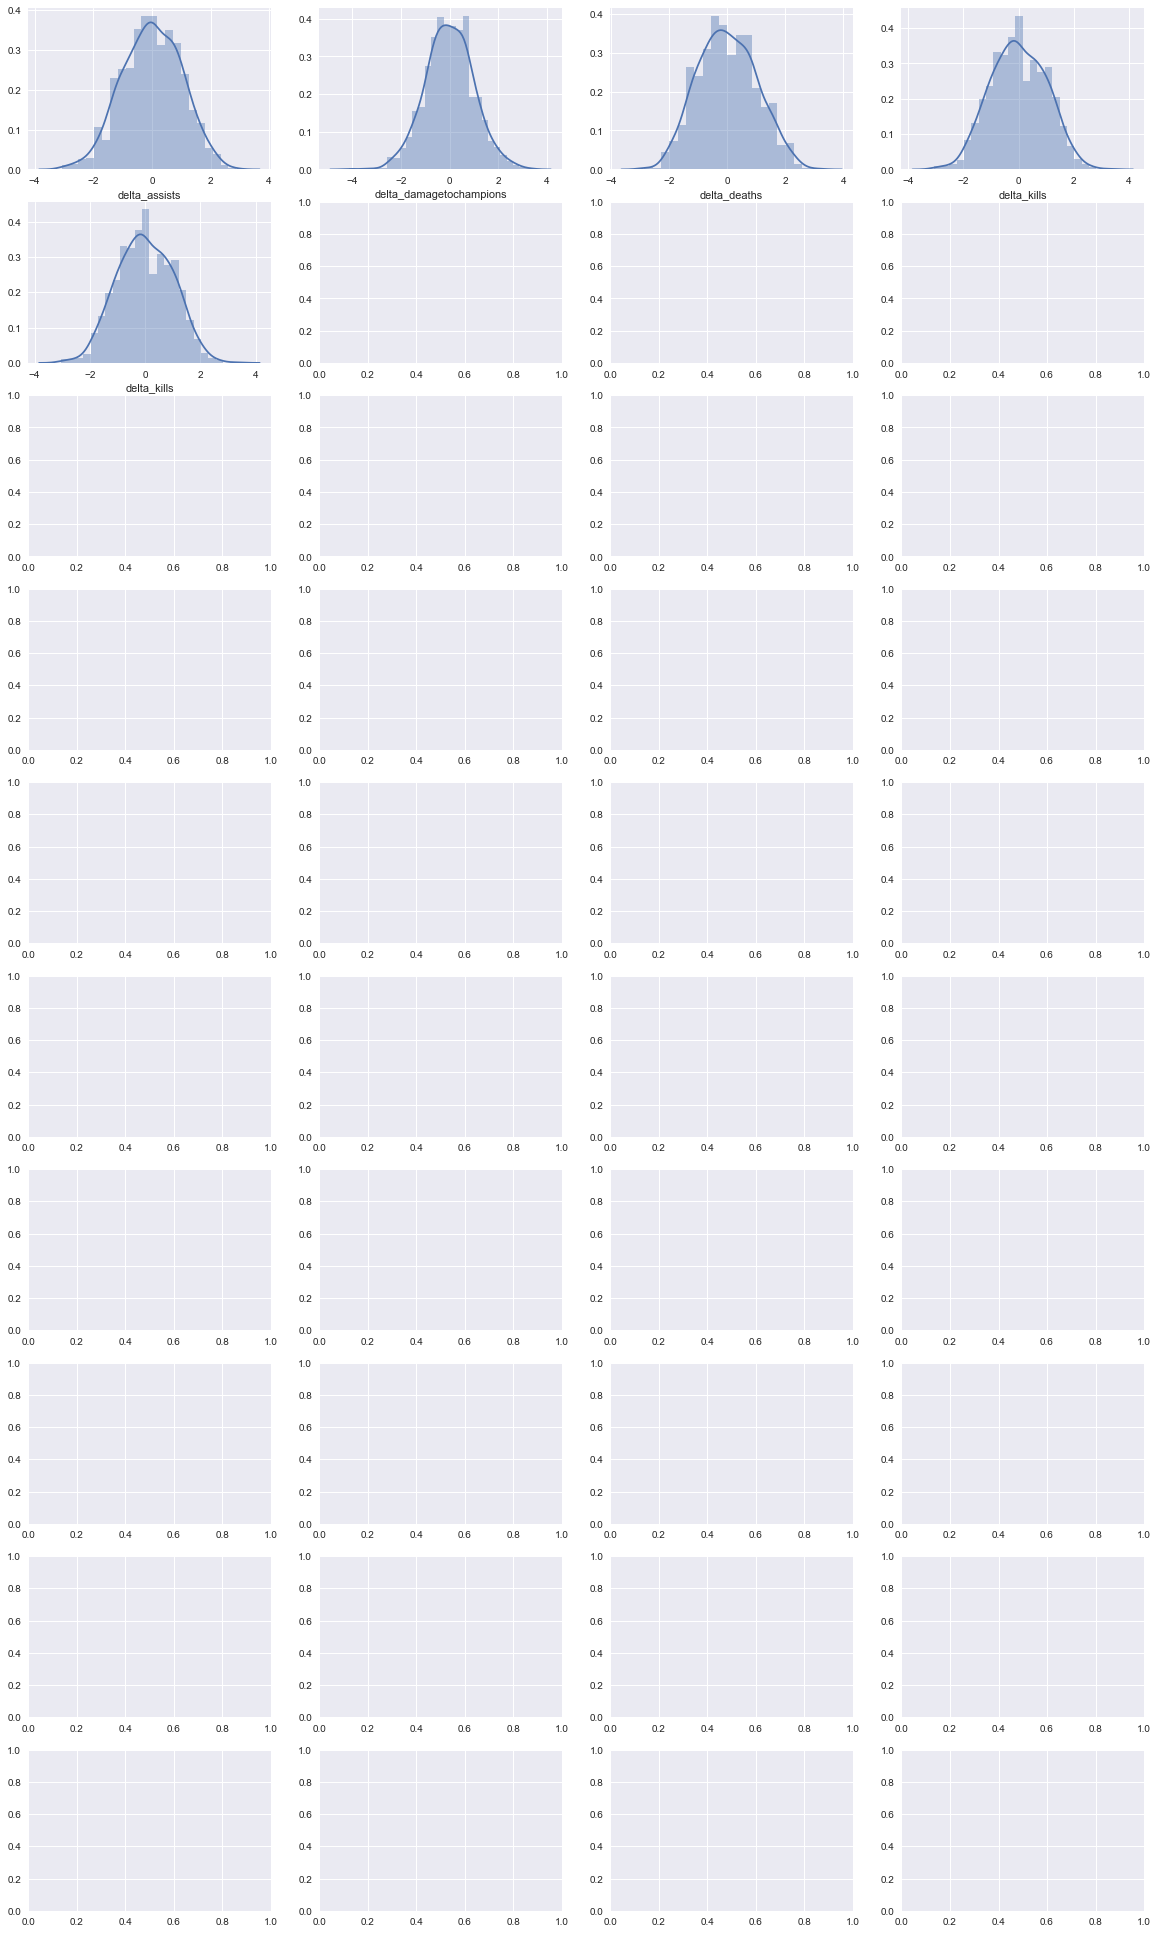

In [85]:
fig, axs = plt.subplots(nrows = 10, ncols=4, figsize = (20,35))
plt.subplots_adjust(hspace = 0.2)
sns.distplot(x_train['delta_assists'], ax=axs[0][0]) 
sns.distplot(x_train['delta_damagetochampions'], ax=axs[0][1]) 
sns.distplot(x_train['delta_deaths'], ax=axs[0][2]) 
sns.distplot(x_train['delta_kills'], ax=axs[0][3]) 

sns.distplot(x_train['delta_kills'], ax=axs[1][0]) 

In [ ]:
fig, axs = plt.subplots(ncols=3)
sns.displot(x='value', y='wage', data=df_melt, ax=axs[0]) 
sns.displot(x='value', y='wage', data=df_melt, ax=axs[1])